<a href="https://colab.research.google.com/github/LerinaMM/brent_crude_oil/blob/main/brent_crude_oil_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Análise Preco do Petroleo Bruto

- Vamos utilizar Séries Temporais para prever o comportamento do preço do Petroleo
- Faremos uma analise utilizando a biblioteca Pycaret
- Vamos utilizar a Biblioteca Pycaret para realizar a previsão do preço do Petróleo nos próximos 24 meses

# 2. Motivação da analise


*   realizamos uma primeira analise sobre commodities que esta disponivel no endereço https://github.com/LerinaMM/commodities onde mostrou no grafico do Brent Crude OIl que o preço da commodity chegava aos menores valores históricos.
*   Nessa analise mostrou que as maiores baixas do preço do petroleo ocorrem num intervalo a cada 5 anos dessa forma gostariamos, através dessa analise, confirmar se esse comportamento se repete nos proximos 4 anos e verificar se teria algum fator para tal comportamento

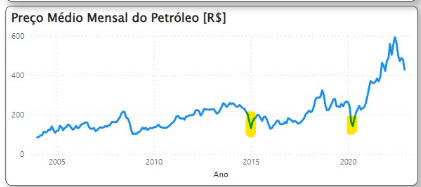

# 3. Vamos utilizar o Yahoo Finance para captar dados do mercado financeiro

O YFinance oferece uma maneira segmentada e Pythonic de baixar dados do mercado do Yahoo finanças

In [2]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 63.2 MB/s 

#3. Importando as Bibliotecas

In [ ]:
# Pacotes para análises de dados
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# Pacotes para análises gráficas
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#Função para data
from datetime import datetime

# Pacotes para calculos estatísticos
import scipy

#YFinance (dados do mercado financeiro)
import yfinance as yf
yf.pdr_override()

#Avisos
import warnings
warnings.filterwarnings("ignore")

# Imports para formatação dos dados
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# Formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format


#4. Coletando os dados da API Yahoo Finance e realizando a escolha do período de tempo

In [ ]:
#Coletando dados da API da Yahoo Finance - Buscamos o código do ativo e escolhemos o período a ser analisado
#Exemplos de períodos de tempos: (1d, 5d, 3mo, 6mo, 1y, 2y, 5y e ytd)

Dados = web.get_data_yahoo('BZ=F', period='15y')

#Shape
Dados.shape

In [ ]:
#Verificando os dados
Dados.head()

In [ ]:
# Registros mais recentes
Dados.tail()

In [ ]:
Dados.info()

##4.1 Retirando as colunas - Open, High, Low, Volume, Adj Close que nao serão utilizadas nas análises

In [ ]:
Dados.drop(columns=["Open","High","Low","Volume","Adj Close"],inplace=True)

In [ ]:
Dados

##4.2 Obter a primeira e a última data do dataset

In [ ]:
#Observar o range de dados

print('Menor data:', Dados.index.min())
print('Maior data:', Dados.index.max())

#5. Transformando o Data Frame para series

In [ ]:
Dados_series=pd.Series(Dados.Close)

In [ ]:
Dados_series.index

## 5.1 Passando para uma frequencia para diária que a operação de setup necessita

In [ ]:
Dados_series.resample("D").mean().dropna()

In [ ]:
Dados_series=Dados_series.resample("D").mean()

In [ ]:
Dados_series.plot();

In [ ]:
#@ Valores de preços do Brent Crude Oil

plt.boxplot(Dados, notch=True, vert=False)
plt.title("Boxplot valores Brent Crude Oil");

In [ ]:
Dados_series.describe()

#6.Setup

A operação de setup no PyCaret é responsável por inicializar o ambiente de treinamento e criar a pipeline de transformação. O setup é um passo obrigatório antes de executar qualquer outra função do PyCaret.

A operação de setup recebe dois parâmetros obrigatórios:

data: um DataFrame Pandas contendo os dados de treinamento.
target: a coluna de destino dos dados de treinamento.
A operação de setup também pode receber uma série de parâmetros opcionais, que são usados para controlar o processo de treinamento e avaliação. Alguns dos parâmetros opcionais mais comuns incluem:

fold: o número de folds de validação cruzada a serem usados.
session_id: um identificador exclusivo para o experimento.
freq: a frequência dos dados.

In [ ]:
# Operação de setup

setup(data=Dados_series, fh=6, numeric_imputation_target='median', fold=3, session_id=101)

#Sendo que fh=Horizontal Forecast indicando na analise 6 meses para analisar e seasonal_period= mensal)
#fold strategy: formato(fold_strategy='sliding')
#      Sliding - aplicar em series temporais diárias
#      Expanding - aplicar em series mensais, trimestrais, anuais

A sessão ID é um identificador exclusivo para o experimento de séries temporais que você está configurando. Ele é usado para rastrear o experimento e seus resultados.

No código que você forneceu, a sessão ID é definida como 101. Isso significa que esse experimento terá um identificador exclusivo de 101.

Você pode usar a sessão ID para acompanhar o experimento em um ambiente de produção. Por exemplo, você pode usar a sessão ID para identificar o experimento que você está usando para gerar previsões para um determinado cliente.

Aqui estão alguns exemplos de como você pode usar a sessão ID:

Para salvar os resultados do experimento para um arquivo, você pode usar a sessão ID como o nome do arquivo.
Para gerar um relatório do experimento, você pode usar a sessão ID como o ID do experimento.
Para acompanhar o desempenho do experimento ao longo do tempo, você pode usar a sessão ID para identificar o experimento.

In [ ]:
#Checando as estatísticas do modelo

check_stats()

In [ ]:
#Verificando o melhor modelo

best_model = compare_models(n_select=3)

#Dentro do parentesis podes colocar (n_select = 3) para escolher os 3 melhores modelos

O SMAPE expressa o erro como uma porcentagem da média dos valores reais e previstos, tornando-o mais interpreto e simétrico, o que significa que erros positivos e negativos têm o mesmo peso na métrica.

Em geral, quanto menor o valor do SMAPE, melhor o desempenho do modelo, pois indica que as previsões estão mais próximas dos valores reais. Portanto, ao usar compare_models() no PyCaret, você pode avaliar os modelos com base no SMAPE e escolher o modelo com o menor valor SMAPE como o melhor modelo para o seu problema de previsão.

In [ ]:
#Criar o modelo a partir do ETS

ets = create_model('ets', fold=10)

In [ ]:
#Criar o modelo a partir do Season Naive Forecaster

season_naive_forecaster = create_model('snaive', fold=10)

In [ ]:
#Plotando o modelo

plot_model(season_naive_forecaster)

In [ ]:
#Vamos "tunar" o modelo para verificar se conseguimos um melhor resultado

season_naive_forecaster_tuned = tune_model(season_naive_forecaster)

In [ ]:
plot_model(season_naive_forecaster_tuned)

In [ ]:
#Verificando agora para realizar uma avaliação de um blend com os 3 melhores modelos


blender = blend_models(best_model)

Aplicando o blend com os tres melhores modelos, ainda obtivemos um SMAPE de 0,0703, resultado pior que o modelo "tunado"

In [ ]:
#Finalizar o modelo

final_model = finalize_model(blender)

Decidimos utilizar o modelo "Blender" por termos obtido o melhor resultado de SMAPE de 0,0679

In [ ]:
final_model

In [ ]:
plot_model(final_model, plot='forecast')

#Proximos 24 meses

In [ ]:
#Vamos plotar o modelo de previsão nos próximos 12 meses

plot_model(final_model, plot='forecast', data_kwargs={'fh' : 24})

In [ ]:
#Valores de predição do modelo

y_predict = predict_model(final_model, fh=24)

São os valores Preditos para os meses, que podem ser levados para o Power BI

In [ ]:
y_predict

In [ ]:
y_predict = y_predict.reset_index()

In [ ]:
y_predict.dtypes

In [ ]:
y_predict.set_index('index', drop=True, inplace=True)

In [ ]:
y_predict['y_pred'] = y_predict['y_pred'].astype(int)

In [ ]:
y_predict.info()

In [ ]:
y_predict.to_csv('predict_model.csv')

In [ ]:
#Se quiser salvar o modelo para inserir no Power BI

save_model(final_model,'aneel_prediction')

##Vamos realizar a união das tabelas dos dados reais mais os dados preditos para poder subir ao Power BI

In [ ]:
# Renomear colunas da tabela 1

tabela1 = novo_df_pred.rename(columns={'Mes': 'mes_ano', 'QuantidadeReclamacoes': 'qtidade_reclamacoes'})

In [ ]:
tabela1

In [ ]:
tabela2 = y_predict.rename(columns={'index': 'mes_ano', 'y_pred': 'qtidade_reclamacoes'})

In [ ]:
tabela2

In [ ]:
# Concatenar as tabelas
tabelas_concatenadas = pd.concat([tabela1, tabela2])

In [ ]:
tabelas_concatenadas

In [ ]:
tabelas_concatenadas.to_csv('tabelas_concatenadas.csv')